<a href="https://colab.research.google.com/github/MAMMARU-class/UEC_3rd_datascience/blob/main/05_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!git clone https://github.com/MAMMARU-class/UEC_3rd_datascience.git

Cloning into 'UEC_3rd_datascience'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 33 (delta 7), reused 29 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 1022.35 KiB | 2.57 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)
plt.rcParams["figure.figsize"] = (10.0, 5.0)

input_path = "./UEC_3rd_datascience/input_data/"

# Titanic EDA

In [81]:
train = pd.read_csv(f"{input_path}/titanic/train.csv", header=0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
train.shape

(891, 12)

In [83]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [84]:
# check entire survival rate
train["Survived"].mean()

np.float64(0.3838383838383838)

In [85]:
# servival rate and sex
train.groupby("Sex").agg({"Survived": "mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [86]:
# sex and room class
pd.crosstab(train["Sex"], train["Pclass"])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [87]:
# ration of each sex between room classes
pd.crosstab(train["Sex"], train["Pclass"], normalize="index")

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [88]:
train.groupby("Pclass").agg({"Survived": "mean"}).reset_index(drop=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [89]:
# ratio of survival among sex and class
train.pivot_table(index="Sex", columns="Pclass", values="Survived", aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [90]:
train.pivot_table(index="Sex", columns="Age", values="Survived", aggfunc="mean")

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,14.50,15.00,16.00,17.00,18.00,19.00,...,48.00,49.00,50.00,51.00,52.00,53.00,54.00,55.00,55.50,56.00,57.00,58.00,59.00,60.00,61.00,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,NaN,NaN,1.0,NaN,NaN,1.0,0.333333,0.5,1.0,1.0,0.5,1.0,0.5,0.0,0.0,0.000000,NaN,1.0,0.75,0.0,1.0,0.833333,0.833333,0.615385,1.000000,...,0.75,1.0,0.8,1.000000,1.00,1.0,1.0,1.0,NaN,1.000000,0.0,1.0,NaN,1.000000,NaN,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
male,1.0,1.0,NaN,1.0,1.0,0.6,0.250000,1.0,0.4,NaN,1.0,0.0,0.5,0.5,0.0,0.333333,1.0,NaN,0.00,NaN,0.0,0.090909,0.142857,0.076923,0.111111,...,0.60,0.5,0.2,0.166667,0.25,NaN,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.333333,0.0,0.333333,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


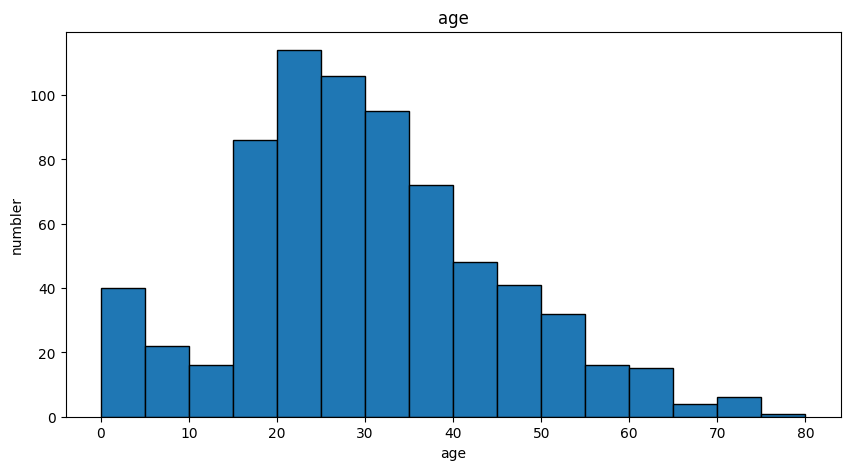

In [91]:
bins = range(0, int(train["Age"].max())+5, 5)
plt.hist(train["Age"], bins=bins, edgecolor="black")

plt.title("age")
plt.xlabel("age")
plt.ylabel("numbler")

plt.show()

In [92]:
labels = [f"{i}-{i+4}" for i in bins[:-1]]
train["Age_group"] = pd.cut(train["Age"], bins=bins, labels=labels, right=False)

<ipython-input-93-e5578694c2d0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = train.groupby("Age_group")["Survived"].mean()


Text(0, 0.5, 'survival rate')

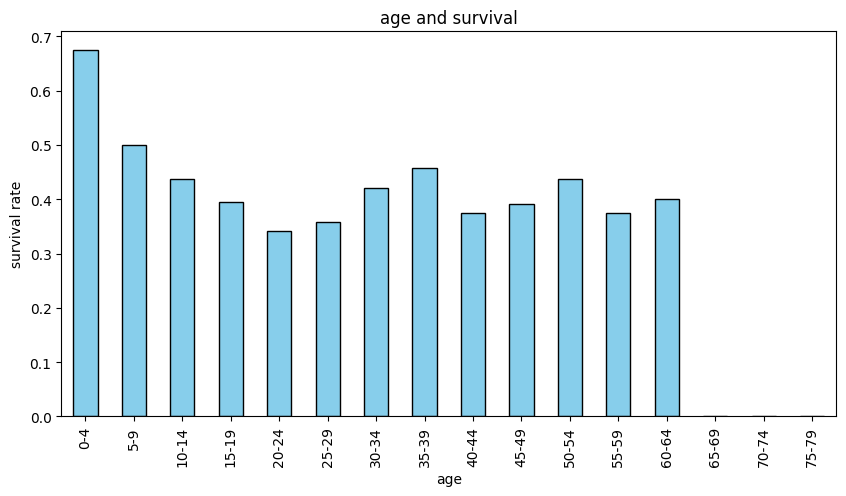

In [93]:
plot_data = train.groupby("Age_group")["Survived"].mean()

plot_data.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("age and survival")
plt.xlabel("age")
plt.ylabel("survival rate")

In [94]:
plot_data = train.groupby("Age_group")["Survived"].mean()
train.pivot_table(index="Sex", columns="Age_group", values="Survived", aggfunc="mean")

<ipython-input-94-57e8cadac8ad>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = train.groupby("Age_group")["Survived"].mean()
<ipython-input-94-57e8cadac8ad>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train.pivot_table(index="Sex", columns="Age_group", values="Survived", aggfunc="mean")


Age_group,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74
Sex,,,,,,,,,,,,,,,
female,0.705882,0.538462,0.555556,0.805556,0.761905,0.666667,0.818182,0.851852,0.722222,0.642857,0.916667,0.833333,1.000000,NaN,NaN
male,0.652174,0.444444,0.285714,0.100000,0.097222,0.236842,0.209677,0.222222,0.166667,0.259259,0.150000,0.100000,0.181818,0.0,0.0


In [95]:
plot_data = train.groupby("Age_group")["Survived"].mean()
train.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="mean")

<ipython-input-95-6f447798e901>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = train.groupby("Age_group")["Survived"].mean()
<ipython-input-95-6f447798e901>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="mean")


Age_group,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74
Pclass,,,,,,,,,,,,,,,
1,0.666667,NaN,1.00,0.812500,0.777778,0.625000,0.777778,0.781250,0.714286,0.521739,0.588235,0.50,0.363636,0.0,0.0
2,1.000000,1.000000,1.00,0.437500,0.434783,0.400000,0.468750,0.250000,0.583333,0.500000,0.363636,0.25,0.500000,0.0,0.0
3,0.520000,0.352941,0.25,0.259259,0.205479,0.266667,0.244444,0.166667,0.045455,0.083333,0.000000,0.00,0.500000,0.0,0.0


In [96]:
train_fe = train[train["Sex"] == "female"]
train_fe.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="count")

<ipython-input-96-bc17f261fb41>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train_fe.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="count")


Age_group,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79
Pclass,,,,,,,,,,,,,,,,
1,1,0,1,12,13,3,11,16,7,6,8,4,3,0,0,0
2,4,4,2,6,11,14,12,5,7,3,4,2,0,0,0,0
3,12,9,6,18,18,13,10,6,4,5,0,0,1,0,0,0


In [97]:
train_fe = train[train["Sex"] == "female"]
train_fe.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="mean")

<ipython-input-97-f45a29812314>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train_fe.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="mean")


Age_group,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64
Pclass,,,,,,,,,,,,,
1,0.000000,NaN,1.000000,1.000000,1.000000,0.666667,1.0,1.0,1.000000,1.0,0.875,1.0,1.0
2,1.000000,1.000000,1.000000,1.000000,0.909091,0.857143,1.0,0.8,0.857143,1.0,1.000,0.5,NaN
3,0.666667,0.333333,0.333333,0.611111,0.500000,0.461538,0.4,0.5,0.000000,0.0,NaN,NaN,1.0


In [98]:
train_ma = train[train["Sex"] == "male"]
train_ma.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="count")

<ipython-input-98-9d013c158f2c>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train_ma.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="count")


Age_group,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79
Pclass,,,,,,,,,,,,,,,,
1,2,0,1,4,5,13,7,16,7,17,9,6,8,2,3,0
2,8,1,0,10,12,16,20,11,5,3,7,2,2,1,1,0
3,13,8,6,36,55,47,35,18,18,7,4,2,1,1,2,0


In [99]:
train_ma = train[train["Sex"] == "male"]
train_ma.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="mean")

<ipython-input-99-ddc1395aead5>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train_ma.pivot_table(index="Pclass", columns="Age_group", values="Survived", aggfunc="mean")


Age_group,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74
Pclass,,,,,,,,,,,,,,,
1,1.000000,NaN,1.000000,0.250000,0.200000,0.615385,0.428571,0.562500,0.428571,0.352941,0.333333,0.166667,0.125,0.0,0.0
2,1.000000,1.000,NaN,0.100000,0.000000,0.000000,0.150000,0.000000,0.200000,0.000000,0.000000,0.000000,0.500,0.0,0.0
3,0.384615,0.375,0.166667,0.083333,0.109091,0.212766,0.200000,0.055556,0.055556,0.142857,0.000000,0.000000,0.000,0.0,0.0


In [100]:
# SibSip
train.pivot_table(index="Pclass", columns="SibSp", values="Survived", aggfunc="count")

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137.0,71.0,5.0,3.0,NaN,NaN,NaN
2,120.0,55.0,8.0,1.0,NaN,NaN,NaN
3,351.0,83.0,15.0,12.0,18.0,5.0,7.0


In [101]:
train.pivot_table(index="Pclass", columns="SibSp", values="Survived", aggfunc="mean")

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,0.562044,0.746479,0.800000,0.666667,NaN,NaN,NaN
2,0.416667,0.581818,0.500000,1.000000,NaN,NaN,NaN
3,0.236467,0.325301,0.333333,0.083333,0.166667,0.0,0.0


In [102]:
train_fe.pivot_table(index="Pclass", columns="SibSp", values="Survived", aggfunc="count")

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,49.0,40.0,3.0,2.0,NaN,NaN,NaN
2,44.0,28.0,3.0,1.0,NaN,NaN,NaN
3,81.0,38.0,7.0,8.0,6.0,1.0,3.0


In [103]:
train_fe.pivot_table(index="Pclass", columns="SibSp", values="Survived", aggfunc="count")

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,49.0,40.0,3.0,2.0,NaN,NaN,NaN
2,44.0,28.0,3.0,1.0,NaN,NaN,NaN
3,81.0,38.0,7.0,8.0,6.0,1.0,3.0


In [104]:
train_ma.pivot_table(index="Pclass", columns="SibSp", values="Survived", aggfunc="mean")

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,0.329545,0.483871,0.500,0.0,NaN,NaN,NaN
2,0.118421,0.259259,0.200,NaN,NaN,NaN,NaN
3,0.129630,0.222222,0.125,0.0,0.083333,0.0,0.0


In [105]:
train_ma.pivot_table(index="Pclass", columns="SibSp", values="Survived", aggfunc="mean")

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,0.329545,0.483871,0.500,0.0,NaN,NaN,NaN
2,0.118421,0.259259,0.200,NaN,NaN,NaN,NaN
3,0.129630,0.222222,0.125,0.0,0.083333,0.0,0.0


In [106]:
# Parch
train.pivot_table(index="Parch", columns="Age_group", values="Survived", aggfunc="count")

<ipython-input-106-38451866fc29>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train.pivot_table(index="Parch", columns="Age_group", values="Survived", aggfunc="count")


Age_group,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79
Parch,,,,,,,,,,,,,,,,
0,0,1,7,64,95,92,82,54,34,33,25,13,12,3,5,0
1,25,10,2,13,8,7,10,9,9,5,6,2,2,1,1,0
2,15,11,7,8,9,6,3,5,2,1,0,1,0,0,0,0
3,0,0,0,1,2,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
5,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [107]:
train.pivot_table(index="Parch", columns="Age_group", values="Survived", aggfunc="mean")

<ipython-input-107-9c82f72166c7>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train.pivot_table(index="Parch", columns="Age_group", values="Survived", aggfunc="mean")


Age_group,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74
Parch,,,,,,,,,,,,,,,
0,NaN,1.000000,0.571429,0.359375,0.252632,0.358696,0.402439,0.425926,0.382353,0.363636,0.4,0.307692,0.416667,0.0,0.0
1,0.72,0.500000,0.500000,0.384615,0.625000,0.428571,0.400000,0.666667,0.555556,0.600000,0.5,1.000000,0.500000,0.0,0.0
2,0.60,0.454545,0.285714,0.750000,0.888889,0.333333,1.000000,0.600000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
3,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
train_ad = train[train["Age"] > 15]
train_ad.pivot_table(index="Parch", columns="Pclass", values="Survived", aggfunc="mean")

Pclass,1,2,3
Parch,,,
0,0.641791,0.352459,0.192913
1,0.655172,0.600000,0.227273
2,0.750000,0.700000,0.444444
3,NaN,1.000000,0.333333
4,0.000000,NaN,0.000000
5,NaN,NaN,0.200000
6,NaN,NaN,0.000000


# Titanicまとめ
判断順\
性別→女性の方が生存率が高い\
等級→上がるにつれて生存率が上がる\
年齢→1番多いのは20歳より少し上、そこから減っていく。また赤ん坊は一定数いる\
生存率は赤ん坊が最も高くそこから20歳にかけて減る。そのあとはほぼ変わらず\
\
例外→\
幼児、子供に関して性別の例外。男性も一定の水準の生存率がある。\
幼児、子供に関して等級の例外。2等までの生存率は高い。ただし3等は例外。そもそも逃げられなかったと考えられる\

Pclassが高いにも関わらず死亡した女性について、一定の傾向は見られなかった。3等の女性に関しては、年齢層がかなり低く、特に幼児が12人いたことから、逃げられずに死亡したケースが多いと考えられる。\
男性も同様である。幼児のみ男性の生存率が高いとはいえ、3等の男児の生存率は著しく低い。また3等男性の中で生存率が高いのは20代後半から30代前半にかけてであり、体力の問題だと考えられる。\
\
横のつながりの数について、1,2等には兄弟が多い人自体が少ないため確かなことが言えないが、3等では兄弟、配偶者が合計で3人を超えると急激に生存率が下がる。全員で逃げようとして逃げ遅れたと考えられる。\
独身女性の生存率が高いのに対し、独身男性の生存率は低い。現実の厳しさを知った\
\
縦のつながりについて、5-9歳で一人で乗ってる子は何なのだろう\
20歳以上を親として、縦のつながりがある、つまり子供がいる親の生存率を調べたところ、人数に比例して高くなることが分かった。\
\
生き残りたければ、結婚して、子供を持つことである


# JLeague EDA

In [185]:
%pip install -qq matplotlib-fontja
import matplotlib_fontja
train = pd.read_csv(f"{input_path}/jleague/train.csv", sep=",", header=0, quotechar="\"")
test = pd.read_csv(f"{input_path}/jleague/test.csv", sep=",", header=0, quotechar="\"")
condition = pd.read_csv(f"{input_path}/jleague/condition.csv", sep=",", header=0, quotechar="\"")
stadium = pd.read_csv(f"{input_path}/jleague/stadium.csv", sep=",", header=0, quotechar="\"")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.1 MB/s eta 0:00:00


In [186]:
train.shape

(1721, 11)

In [187]:
test.shape

(313, 10)

In [188]:
condition.shape

(2034, 31)

In [189]:
stadium.shape

(59, 3)

In [190]:
dat = pd.concat([train, test], axis=0)
# yがnanならTestを入れるという、lambda関数
dat["data"] = dat["y"].apply(lambda x: "Test" if np.isnan(x) else "Train")

In [191]:
dat.shape

(2034, 12)

In [192]:
dat = pd.merge(dat, condition, how="inner", on="id")
dat.shape

(2034, 42)

In [193]:
dat = pd.merge(dat, stadium, how="inner", left_on="stadium", right_on="name")
dat.shape

(2034, 45)

In [194]:
dat.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,data,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,name,address,capa
0,13994,18250.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,Train,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,ユアテックスタジアム仙台,宮城県仙台市泉区七北田字柳78,19694
1,13995,24316.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,Train,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,13996,17066.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,Train,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,万博記念競技場,大阪府吹田市千里万博公園5-2,21000
3,13997,29603.0,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,Train,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,エディオンスタジアム広島,広島県広島市安佐南区大塚西5-1-1,50000
4,13998,25353.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,Train,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,札幌ドーム,北海道札幌市豊平区羊ヶ丘1,39232


In [195]:
dat.isnull().agg("mean")

,0
id,0.000000
y,0.153884
year,0.000000
stage,0.000000
match,0.000000
gameday,0.000000
time,0.000000
home,0.000000
away,0.000000
stadium,0.000000


In [196]:
dat["id"].nunique()

2034

array([[<Axes: title={'center': 'y'}>]], dtype=object)

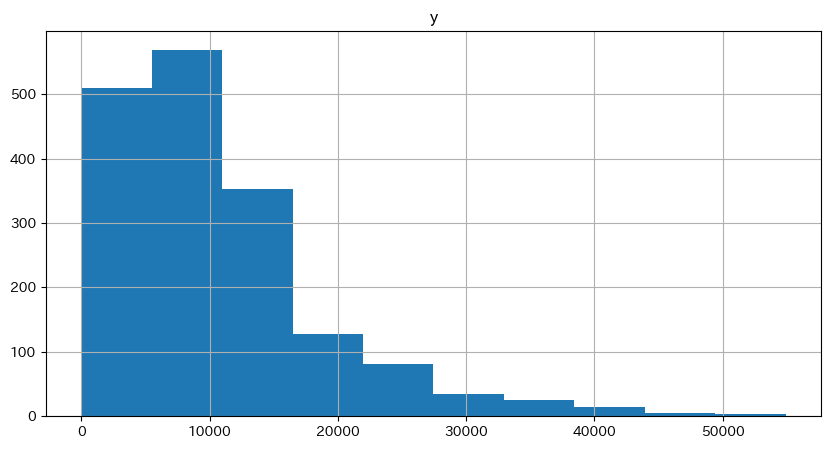

In [197]:
y = dat[dat["data"] == "Train"][["y"]].copy()
y.hist()

<Axes: xlabel='year', ylabel='count'>

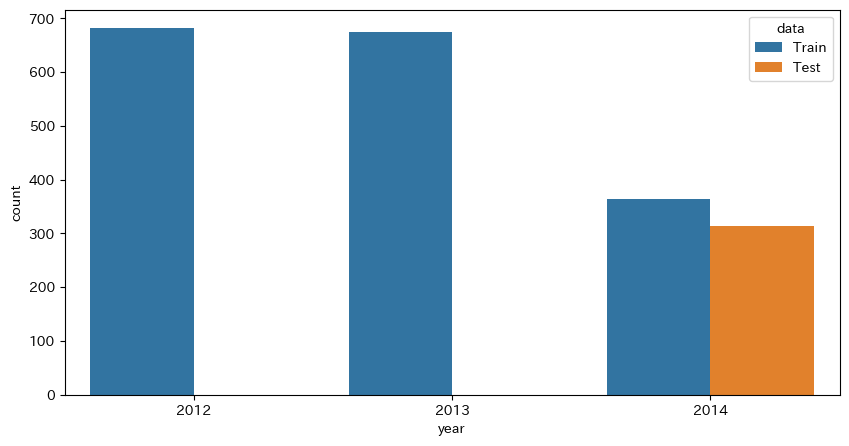

In [198]:
sns.countplot(x="year", hue="data", data=dat)

<Axes: xlabel='stage', ylabel='count'>

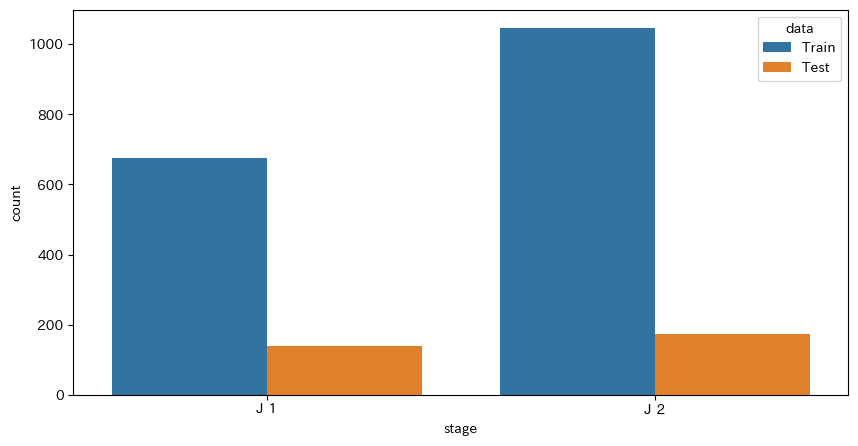

In [199]:
sns.countplot(x="stage", hue="data", data=dat)

In [200]:
dat_match = dat[["match", "y", "data", "stage"]].copy()
# 第{}節第{}日
dat_match["match_num"] = dat_match["match"].apply(lambda x: int(x.split("節")[0].replace("第","")))

<Axes: xlabel='match_num', ylabel='count'>

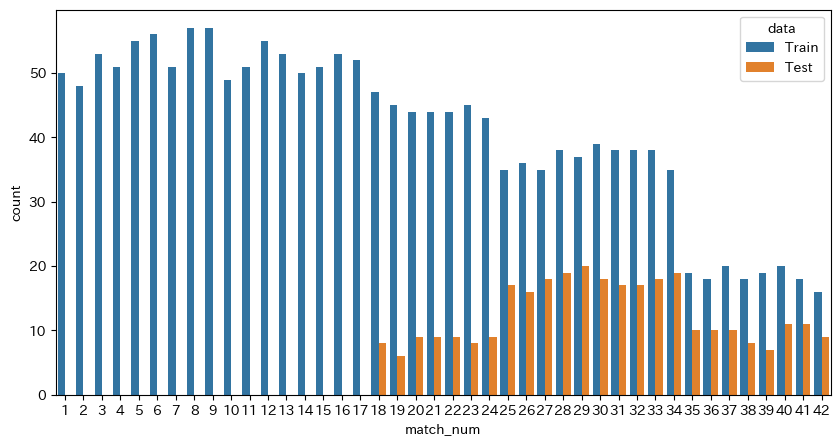

In [201]:
# testは最新年度の後半のみ
sns.countplot(x="match_num", hue="data", data=dat_match)

<Axes: xlabel='match_num', ylabel='y'>

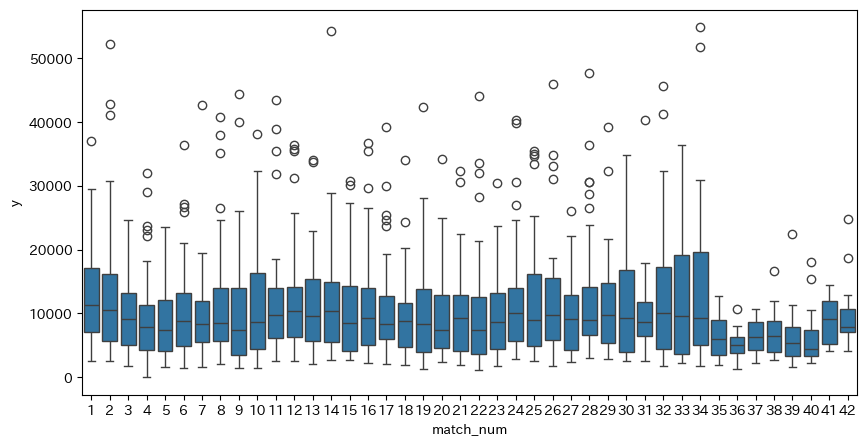

In [202]:
check_y = dat_match[dat_match["data"] == "Train"].copy()
sns.boxplot(x="match_num", y="y", data=check_y)

In [203]:
train = dat[dat["data"]=="Train"]
train_format = train[["y", "stage", "match", "gameday", "time", "home", "away", "stadium", "tv", "home_score", "away_score", "weather", "temperature", "humidity", "home_team", "away_team"]].copy()
train_format.head()

,y,stage,match,gameday,time,home,away,stadium,tv,home_score,away_score,weather,temperature,humidity,home_team,away_team
0,18250.0,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,1,0,雨,3.8,66%,ベガルタ仙台,鹿島アントラーズ
1,24316.0,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,1,0,屋内,12.4,43%,名古屋グランパス,清水エスパルス
2,17066.0,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,2,3,晴一時雨,11.3,41%,ガンバ大阪,ヴィッセル神戸
3,29603.0,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,1,0,曇一時雨のち晴,11.4,52%,サンフレッチェ広島,浦和レッズ
4,25353.0,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,0,0,屋内,22.5,32%,コンサドーレ札幌,ジュビロ磐田


In [330]:
train_format["month"] = train_format["gameday"].apply(lambda x: int(x.split("/")[0]))
train_format["day_of_week"] = train_format["gameday"].apply(lambda x: x.split("(")[1].replace(")",""))
train_format["team"] = train_format["home"] + "/" + train_format["away"]


array([[<Axes: title={'center': 'month'}>]], dtype=object)

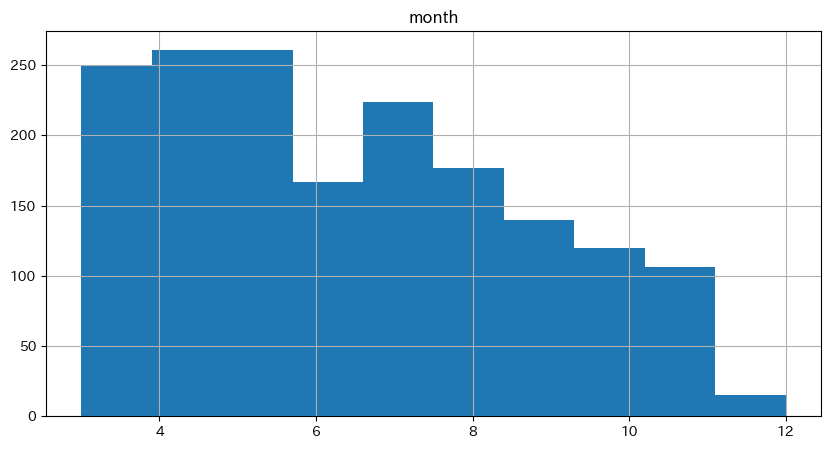

In [331]:
month_data = train_format[["month"]].copy()
month_data.hist()

In [332]:
train_format.groupby("month").agg({"y": "mean"}).sort_values("y", ascending=False)

,y
month,
12,24598.466667
11,13144.915094
10,11441.516667
5,11429.747126
8,11154.485876
9,10728.400000
7,10372.361607
3,10245.988000
4,9629.727969


In [333]:
train_format.groupby("day_of_week").agg({"y": "count"})

,y
day_of_week,
土,696
土・祝,37
日,701
日・祝,10
月,4
月・休,23
月・祝,16
木,4
木・祝,18


In [334]:
train_format.groupby("day_of_week").agg({"y": "mean"})

,y
day_of_week,
土,14273.982759
土・祝,17623.567568
日,7418.863053
日・祝,7373.200000
月,5360.500000
月・休,12230.130435
月・祝,5678.187500
木,3872.500000
木・祝,10709.055556


In [335]:
train_format.groupby("day_of_week").agg({"y": "mean"}).sort_values("y", ascending=False)

,y
day_of_week,
土・祝,17623.567568
土,14273.982759
火・休,12726.000000
火,12694.000000
金・祝,12661.823529
月・休,12230.130435
木・祝,10709.055556
火・祝,9487.478261
水,8621.147826


**月、曜日について**\
試合数は12月にかけて少なくなるが、動員数は逆。\
曜日は土日が多い。平日ではなぜか水曜日だけ多いが、動員数はいまいち。\
また、日曜日には来たがらない傾向が高い。たとえ祝日でも。\
なぜか火曜日が基本的に多い。ほかに理由が？

<Axes: xlabel='home', ylabel='count'>

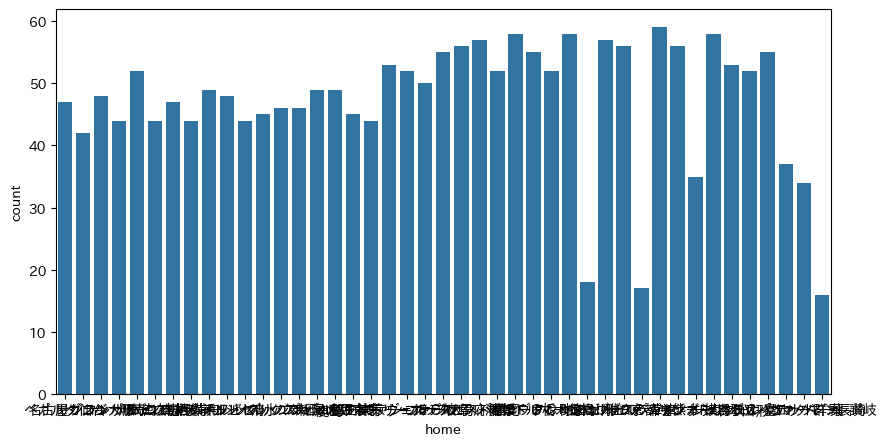

In [336]:
sns.countplot(x="home", data=dat)

In [337]:
# たまにすごく不人気なところがある
home_check = dat.groupby("home").agg({"y": "count"})
home_check[home_check["y"] < 30]

,y
home,
カマタマーレ讃岐,9
ザスパクサツ群馬,28
ザスパ草津,17
ＦＣ町田ゼルビア,18
Ｖ・ファーレン長崎,27


In [338]:
away_check = dat.groupby("away").agg({"y": "count"})
away_check[away_check["y"] < 30]

,y
away,
カマタマーレ讃岐,12
ザスパ草津,19
ＦＣ町田ゼルビア,20


In [339]:
# 不人気なところチェック　→　やはり少なかった
no_famous_teams = ["カマタマーレ讃岐", "ザスパ草津", "ＦＣ町田ゼルビア"]
no_famous_team_dat = train_format[train_format["team"].apply(lambda x: any(part in no_famous_teams for part in x.split("/")))]
no_famous_team_dat["y"].mean()

np.float64(4631.5053763440865)

In [340]:
game_count_home = train_format.groupby("home").agg({"y": "count"}
          ).reset_index(drop=False).rename(columns={"home": "team"})
game_count_away = train_format.groupby("away").agg({"y": "count"}
          ).reset_index(drop=False).rename(columns={"away": "team"}).rename(columns={"y": "y_dash"})

game_count = pd.merge(game_count_home, game_count_away, how="outer", on="team")
game_count["game_count"] = game_count["y"] + game_count["y_dash"]
game_count = game_count.drop(columns=["y"])
game_count = game_count.drop(columns=["y_dash"])
game_count = game_count.sort_values("game_count", ascending=False).reset_index(drop=True)
game_count.head()

,team,game_count
0,ロアッソ熊本,104
1,松本山雅ＦＣ,98
2,愛媛ＦＣ,97
3,水戸ホーリーホック,97
4,栃木ＳＣ,97


やってみたいこと\
2012, 2013, 2014で分け、チームごとにJ1、J2の割合を調べる。\
そのうえで各年、および合計での動員数平均を出す

In [341]:
# add J1 and J2 data
J1_count_home = train_format[train_format["stage"] == "Ｊ１"].groupby("home").agg({"y": "count"}
          ).reset_index(drop=False).rename(columns={"home": "team"})
J1_count_away = train_format[train_format["stage"] == "Ｊ１"].groupby("away").agg({"y": "count"}
          ).reset_index(drop=False).rename(columns={"away": "team"}).rename(columns={"y": "y_dash"})

J1_count = pd.merge(J1_count_home, J1_count_away, how="outer", on="team")
J1_count["J1_count"] = J1_count["y"] + J1_count["y_dash"]
J1_count = J1_count.drop(columns=["y"])
J1_count = J1_count.drop(columns=["y_dash"])

game_count = pd.merge(game_count, J1_count, how="left", on="team").fillna(0)

J2_count_home = train_format[train_format["stage"] == "Ｊ２"].groupby("home").agg({"y": "count"}
          ).reset_index(drop=False).rename(columns={"home": "team"})
J2_count_away = train_format[train_format["stage"] == "Ｊ２"].groupby("away").agg({"y": "count"}
          ).reset_index(drop=False).rename(columns={"away": "team"}).rename(columns={"y": "y_dash"})

J2_count = pd.merge(J2_count_home, J2_count_away, how="outer", on="team")
J2_count["J2_count"] = J2_count["y"] + J2_count["y_dash"]
J2_count = J2_count.drop(columns=["y"])
J2_count = J2_count.drop(columns=["y_dash"])

game_count = pd.merge(game_count, J2_count, how="left", on="team").fillna(0)

game_count["J1_rate"] = game_count["J1_count"] / game_count["game_count"]

game_count.head(30)

,team,game_count,J1_count,J2_count,J1_rate
0,ロアッソ熊本,104,0.0,104.0,0.000000
1,松本山雅ＦＣ,98,0.0,98.0,0.000000
2,愛媛ＦＣ,97,0.0,97.0,0.000000
3,水戸ホーリーホック,97,0.0,97.0,0.000000
4,栃木ＳＣ,97,0.0,97.0,0.000000
5,湘南ベルマーレ,95,33.0,62.0,0.347368
6,京都サンガF.C.,94,0.0,94.0,0.000000
7,モンテディオ山形,94,0.0,94.0,0.000000
8,アビスパ福岡,94,0.0,94.0,0.000000
9,カターレ富山,94,0.0,94.0,0.000000


In [342]:
# add sum y
y_sum_home = train_format.groupby("home").agg({"y": "sum"}
          ).reset_index(drop=False).rename(columns={"home": "team"})
y_sum_away = train_format.groupby("away").agg({"y": "sum"}
          ).reset_index(drop=False).rename(columns={"away": "team"}).rename(columns={"y": "y_dash"})

y_sum = pd.merge(y_sum_home, y_sum_away, how="outer", on="team")
y_sum["y_sum"] = y_sum["y"] + y_sum["y_dash"]
y_sum = y_sum.drop(columns=["y"])
y_sum = y_sum.drop(columns=["y_dash"])

game_count = pd.merge(game_count, y_sum, how="left", on="team").fillna(0)
game_count["y_mean"] = game_count["y_sum"] / game_count["game_count"]
game_count = game_count.drop(columns=["y_sum"])
game_count.head()

,team,game_count,J1_count,J2_count,J1_rate,y_mean
0,ロアッソ熊本,104,0.0,104.0,0.0,6074.778846
1,松本山雅ＦＣ,98,0.0,98.0,0.0,8808.602041
2,愛媛ＦＣ,97,0.0,97.0,0.0,4797.247423
3,水戸ホーリーホック,97,0.0,97.0,0.0,4942.938144
4,栃木ＳＣ,97,0.0,97.0,0.0,4981.567010


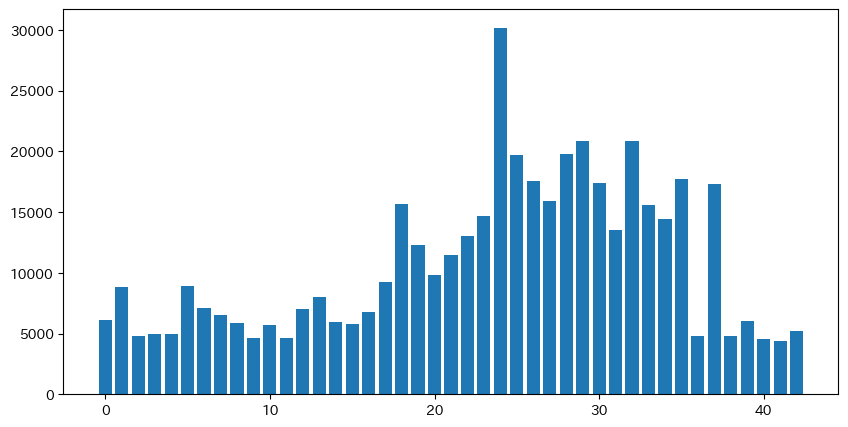

In [343]:
plt.bar(game_count.index, game_count["y_mean"])
plt.show()

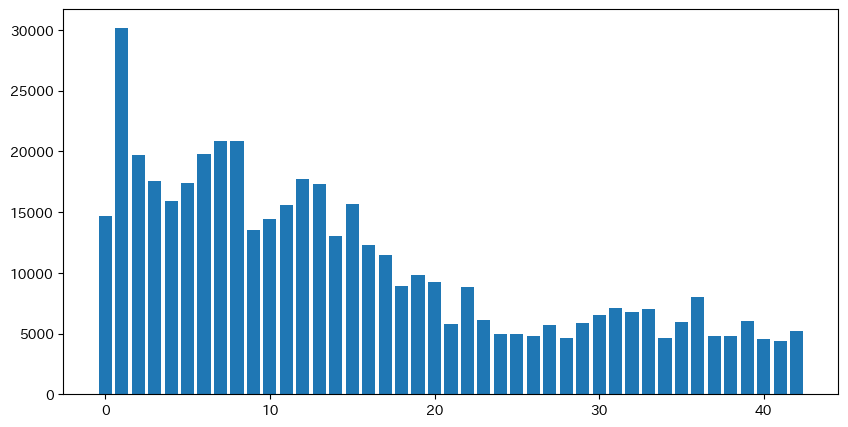

In [344]:
game_count_sort_J1 = game_count.sort_values("J1_count", ascending=False).reset_index(drop=True)
plt.bar(game_count_sort_J1.index, game_count_sort_J1["y_mean"])
plt.show()

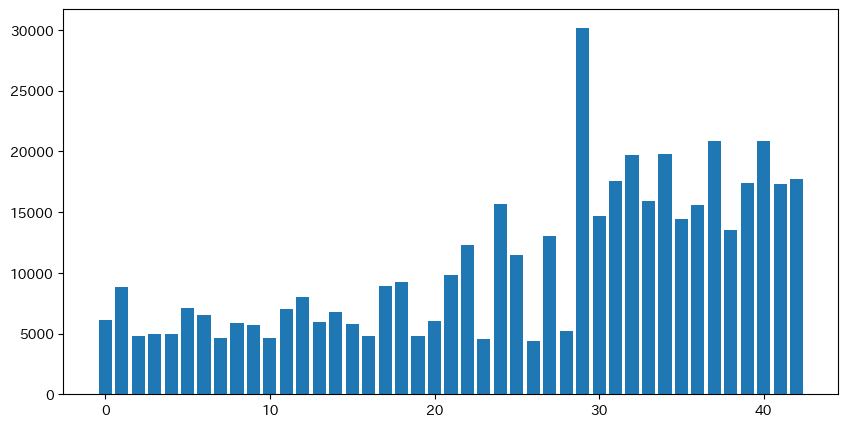

In [345]:
game_count_sort_J2 = game_count.sort_values("J2_count", ascending=False).reset_index(drop=True)
plt.bar(game_count_sort_J2.index, game_count_sort_J2["y_mean"])
plt.show()

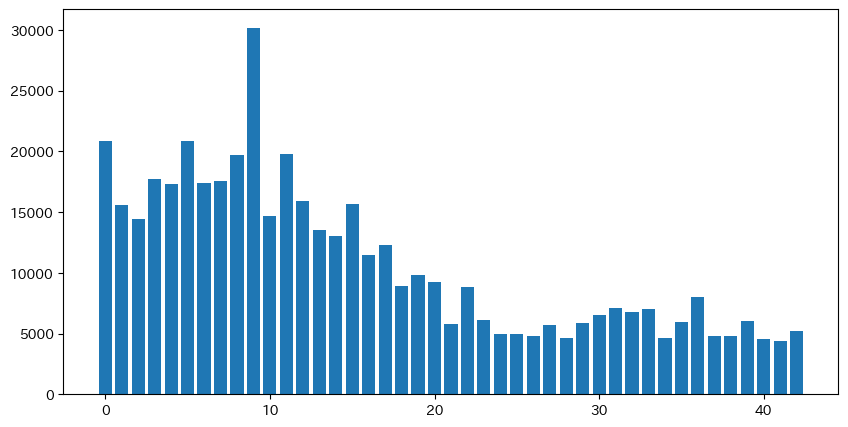

In [346]:
game_count_sort_J1_rate = game_count.sort_values("J1_rate", ascending=False).reset_index(drop=True)
plt.bar(game_count_sort_J1_rate.index, game_count_sort_J1_rate["y_mean"])
plt.show()

In [347]:
game_count[game_count["y_mean"] > 29000]

,team,game_count,J1_count,J2_count,J1_rate,y_mean
24,浦和レッズ,78,78.0,0.0,1.0,30187.653846


**試合数について**\
試合数は多ければいいというものではない\
試合数は真ん中あたりが最も試合動員数が多かった\
予想通り、J1の試合がおおいチームほど動員数が多い傾向があったが、例外もあった。\
試合数の中に占めるJ1リーグの割合を見ると、これも多い方が試合動員数が多かった。\
浦和レッズのみ異常に人気

In [349]:
train_format.head(1)

,y,stage,match,gameday,time,home,away,stadium,tv,home_score,away_score,weather,temperature,humidity,home_team,away_team,month,day_of_week,team,weather_ease
0,18250.0,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,1,0,雨,3.8,66%,ベガルタ仙台,鹿島アントラーズ,3,土,ベガルタ仙台/鹿島アントラーズ,雨


In [352]:
stadium_check = train_format[["y", "stadium", "weather", "temperature", "humidity", "month"]].copy()
stadium_check.head()

,y,stadium,weather,temperature,humidity,month
0,18250.0,ユアテックスタジアム仙台,雨,3.8,66%,3
1,24316.0,豊田スタジアム,屋内,12.4,43%,3
2,17066.0,万博記念競技場,晴一時雨,11.3,41%,3
3,29603.0,エディオンスタジアム広島,曇一時雨のち晴,11.4,52%,3
4,25353.0,札幌ドーム,屋内,22.5,32%,3


In [356]:
stadium_check["weather_cate"] = stadium_check["weather"].apply(lambda x: x[0])
stadium_check = stadium_check.drop(columns=["weather"])
stadium_check.head()

,y,stadium,temperature,humidity,month,weather_cate
0,18250.0,ユアテックスタジアム仙台,3.8,66%,3,雨
1,24316.0,豊田スタジアム,12.4,43%,3,屋
2,17066.0,万博記念競技場,11.3,41%,3,晴
3,29603.0,エディオンスタジアム広島,11.4,52%,3,曇
4,25353.0,札幌ドーム,22.5,32%,3,屋


In [358]:
stadium_check.pivot_table(index="stadium", columns="weather_cate", values="y", aggfunc="mean").fillna(0)

weather_cate,屋,晴,曇,雨,雪
stadium,,,,,
うまかな・よかなスタジアム,0.0,6609.833333,6180.272727,7546.200,0.0
とりぎんバードスタジアム,0.0,4248.888889,3517.888889,2884.500,0.0
エコパスタジアム,0.0,23543.750000,21420.000000,0.000,0.0
エディオンスタジアム広島,0.0,16181.421053,17099.357143,14814.250,0.0
キンチョウスタジアム,0.0,13568.235294,15031.666667,11666.750,0.0
...,...,...,...,...,...
鹿児島県立鴨池陸上競技場,0.0,5594.000000,5417.000000,0.000,0.0
ＩＡＩスタジアム日本平,0.0,13996.680000,14978.428571,13798.600,0.0
ＮＡＣＫ５スタジアム大宮,0.0,11200.909091,10159.000000,10189.250,0.0


In [387]:
stadium_each = stadium_check.groupby("stadium").agg({"y": "mean"}).reset_index(drop=False)
stadium_each = stadium_each.sort_values("y", ascending=False).reset_index(drop=True)
stadium_each.head()

,stadium,y
0,埼玉スタジアム２００２,36312.700000
1,ヤンマースタジアム長居,28062.133333
2,日産スタジアム,26584.700000
3,デンカビッグスワンスタジアム,25248.621622
4,エコパスタジアム,23119.000000


In [388]:
def add_weather(stadium_checck, stadium_each, weather):
  stadium_weather = stadium_check[stadium_check["weather_cate"] == weather
                                  ].groupby("stadium").agg({"y": "mean"}).rename(columns={"y": f"y_{weather}"})
  return pd.merge(stadium_each, stadium_weather, how="left", on="stadium")

In [389]:
stadium_each = add_weather(stadium_check, stadium_each, "屋")
stadium_each = add_weather(stadium_check, stadium_each, "晴")
stadium_each = add_weather(stadium_check, stadium_each, "曇")
stadium_each = add_weather(stadium_check, stadium_each, "雨")
stadium_each = add_weather(stadium_check, stadium_each, "雪")

In [390]:
stadium_each = stadium_each.fillna(0)
stadium_each.head()

,stadium,y,y_屋,y_晴,y_曇,y_雨,y_雪
0,埼玉スタジアム２００２,36312.700000,0.0,37188.807692,36430.166667,33377.250000,0.0
1,ヤンマースタジアム長居,28062.133333,0.0,27779.125000,26382.500000,31056.333333,0.0
2,日産スタジアム,26584.700000,0.0,26917.800000,27697.714286,21767.000000,0.0
3,デンカビッグスワンスタジアム,25248.621622,0.0,26556.833333,23576.461538,24947.000000,0.0
4,エコパスタジアム,23119.000000,0.0,23543.750000,21420.000000,0.000000,0.0


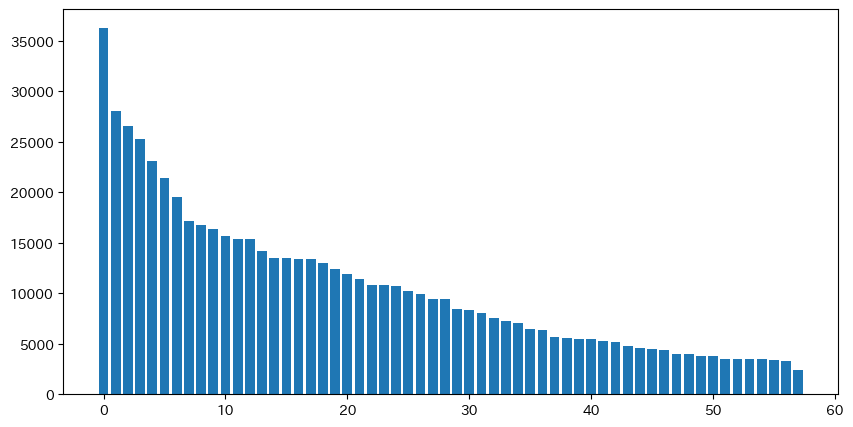

In [391]:
plt.bar(stadium_each.index, stadium_each["y"])
plt.show()

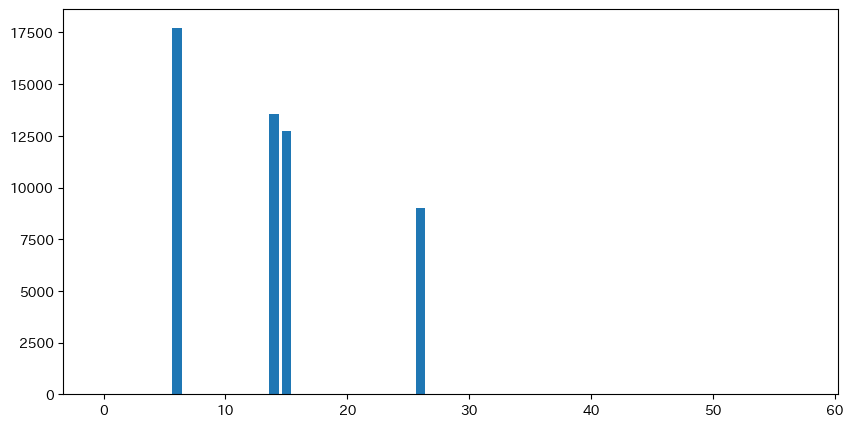

In [392]:
plt.bar(stadium_each.index, stadium_each["y_屋"])
plt.show()

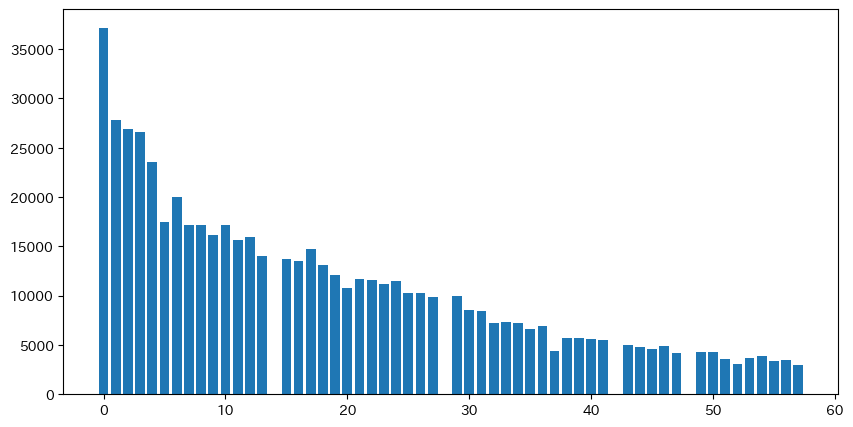

In [393]:
plt.bar(stadium_each.index, stadium_each["y_晴"])
plt.show()

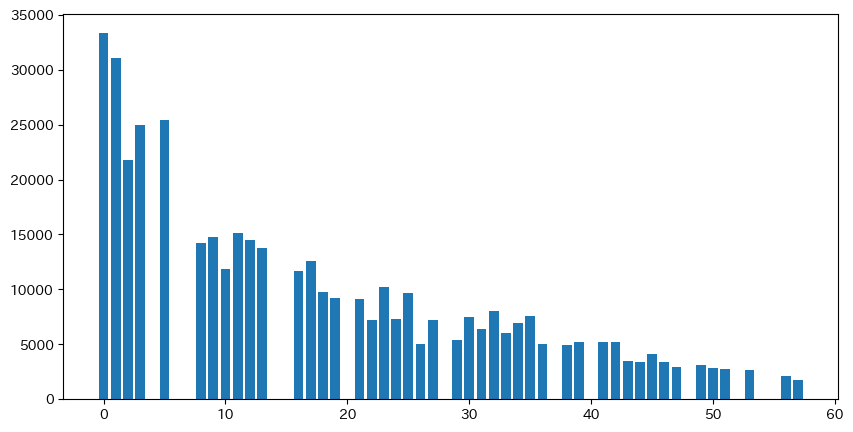

In [394]:
plt.bar(stadium_each.index, stadium_each["y_雨"])
plt.show()

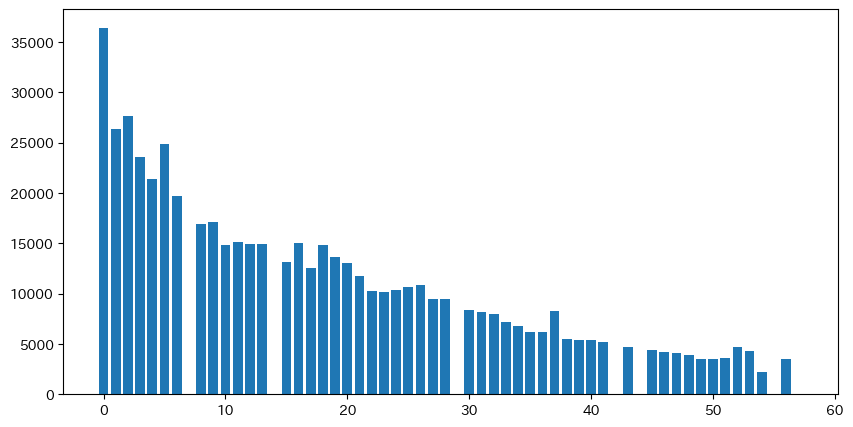

In [395]:
plt.bar(stadium_each.index, stadium_each["y_曇"])
plt.show()

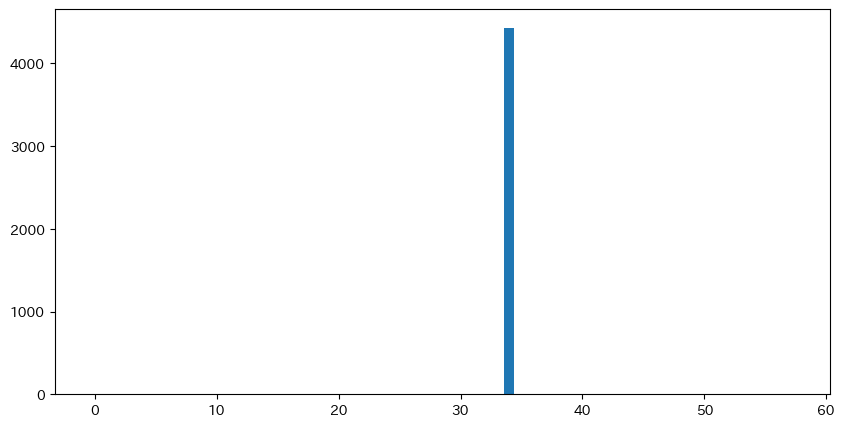

In [396]:
plt.bar(stadium_each.index, stadium_each["y_雪"])
plt.show()

**観客動員数について**\
観客動員数はあまり天気に左右されない。\
おそらく、サイズの問題だろう。\
よって、屋内スタジアムの動員数が多いのは、天気の問題ではなくそもそも屋内のスタジアムが比較的大きいためだと思われる。

In [397]:
train_format.head(1)

,y,stage,match,gameday,time,home,away,stadium,tv,home_score,away_score,weather,temperature,humidity,home_team,away_team,month,day_of_week,team,weather_ease
0,18250.0,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,1,0,雨,3.8,66%,ベガルタ仙台,鹿島アントラーズ,3,土,ベガルタ仙台/鹿島アントラーズ,雨


In [400]:
train_format.groupby("tv").agg({"y": "count"}).head(40)

,y
tv,
スカパー！,3
スカパー！／スカパー！プレミアムサービス,806
スカパー！／スカパー！プレミアムサービス※１,2
スカパー！／スカパー！プレミアムサービス／あいテレビ,2
スカパー！／スカパー！プレミアムサービス／とちぎテレビ,9
スカパー！／スカパー！プレミアムサービス／とちぎテレビ（録）,17
スカパー！／スカパー！プレミアムサービス／テレビ信州,2
スカパー！／スカパー！プレミアムサービス／テレビ大分,1
スカパー！／スカパー！プレミアムサービス／テレビ愛媛（録）,1


ほぼスカパーである\
テレビ会社は関係ないでしょう\
スカパーは同じものであるとして\
スカパー or スカパー＋ほかのテレビ\
に違いがあるか調べよう



In [423]:
tv_check = train_format[["y", "tv"]].copy()
tv_check["スカパー"] = tv_check["tv"].apply(lambda x: 1 if ("スカパー" in x) or ("e2" in x) else 0)
tv_check[tv_check["スカパー"] == 0].head()

,y,tv,スカパー


In [424]:
tv_check["ＮＨＫ"] = tv_check["tv"].apply(lambda x: 1 if "ＮＨＫ" in x else 0)
tv_check[tv_check["ＮＨＫ"] == 0].head()

,y,tv,スカパー,ＮＨＫ
6,18920.0,スカパー／ｅ２／スカパー光,1,0
8,13082.0,スカパー／ｅ２／スカパー光（ＴＢＳチャンネル）,1,0
10,19488.0,スカパー／ｅ２／スカパー光（ＴＢＳチャンネル）,1,0
11,26294.0,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／新潟総合テレビ,1,0
13,13231.0,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／テレビ静岡,1,0


In [430]:
tv_check["地方テレビ"] = tv_check["tv"].apply(lambda x: 1 if ("テレ" in x) or ("放送" in x) else 0)
tv_check[(tv_check["地方テレビ"] == 0) & (tv_check["ＮＨＫ"] == 0)].head(50)

,y,tv,スカパー,ＮＨＫ,地方テレビ
6,18920.0,スカパー／ｅ２／スカパー光,1,0,0
8,13082.0,スカパー／ｅ２／スカパー光（ＴＢＳチャンネル）,1,0,0
10,19488.0,スカパー／ｅ２／スカパー光（ＴＢＳチャンネル）,1,0,0
14,10653.0,スカパー／ｅ２／スカパー光,1,0,0
15,14036.0,スカパー／ｅ２／スカパー光,1,0,0
17,11831.0,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）,1,0,0
18,14349.0,スカパー／ｅ２／スカパー光,1,0,0
20,11839.0,スカパー／ｅ２／スカパー光（ＴＢＳチャンネル）,1,0,0
21,10611.0,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）,1,0,0
22,20192.0,スカパー／ｅ２／スカパー光,1,0,0
